In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import base64
%matplotlib inline

### 載入測試圖片
下面提供三種圖片載入方法
1. 使用 PIL Image
2. 使用 cv2
3. 使用 base64

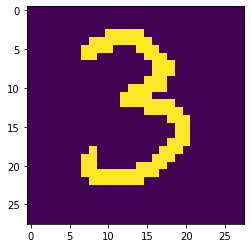

In [2]:
# 載入圖片Method1
image = Image.open('./data/3.png').convert("L")
image = image.resize((28,28))
im2arr = np.array(image)
im2arr = im2arr.reshape(1,28,28,1)
plt.imshow(image)

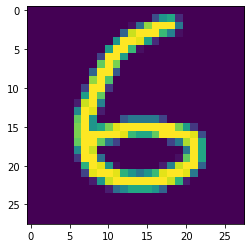

In [3]:
# 載入圖片Method2
image = cv2.imread("./data/6.png")[:,:,::-1]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)/255
reshapImg=image.reshape(-1)
plt.imshow(image)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


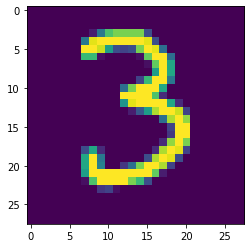

In [4]:
# 載入圖片Method3(匯入base64圖片)
## base64 to cv2
def base64_cv2(base64_str):
    imgString = base64.b64decode(base64_str)
    nparr = np.fromstring(imgString,np.uint8)  
    image = cv2.imdecode(nparr,cv2.IMREAD_COLOR)
    return image

base64Image='iVBORw0KGgoAAAANSUhEUgAAAIwAAACMCAYAAACuwEE+AAAISUlEQVR4Xu2dTchWRRTH/8c+pSAjoyAq+wSpoE1Fm7RVtKp2EUFBi4paVCopGBlFn2Ytily2KGqXS5dKLcRWFbhRQ8FFkYiG1hulJybuo0+P+j5zZubee+be/7t9z5w78z+/58zce+eeEfCPChgUEIMtTakACAwhMClAYExy0ZjAkAGTAgTGJBeNCQwZMClAYExy0ZjAkAGTAgTGJBeNCQwZMClAYExy0ZjAkAGTAgTGJBeNCQwZMClAYExy0XhwwKjqagBPAXgUwLJCIV4AsEFEPi7kr1o3gwBGVd8F8AyA5S1HYqeIBCBH+1ctMKq6AsAaAM8CuKjDCG4Tkcc6vJ6rS1UFzBQkTxacblICsktE7k9pWHubKoBR1U+aTHKhI8F3i8h9jvrTSVdcA6OqLwHYArjdSrpXRG7vJFJOLuIWGFXdB+AWJzot1o1DInJ9Bf0s0kWXwKjqbx3c8RQRsHEymkzjDpiKMssscNtF5OGSFHr05QqYZs3ykUehIvv0rYg8EGlbpZk3YI4DuKyAkv8A+BLA5yKyw+pPVUObVdZ2jX249rqhPhX2BowmBmnS7BiArSKyPtMPmmz3fsZDwR0i8mBuP7y1HwIwAZIvAGwWkQOlBVbVvQBuTfT78tAyTc3A/A3g9jYgmYVDVQ8BuC4BmpMi4ulhY8IQ/t/EGzCxa5gFEVmaPXqDg4xMcyq88xpKpvEGTHiyO+8u6ZiIlNq2YEAGYV2zHcBDpkZnjPeLSOrUlnjJ8s1cAROGN+cOpXfRxw6NO2AaaEKm2QTgiuY3Eha2m7ykdVXdBSD1xWPVC2GXwJRPpOU9Zjxk7Hz9VXL0BCZDzVRoRKRa3avteEacizZV1T0AVlqcEhiLWgO0tT6nITADhMA6JFX9BcA1Me0ITIxKI7BR1ah3YQRmBDDEDJHAxKhEm9MKEBjCEK2A5RabU1K0rMM1VNWTAJbEjJDAxKg0YBtVPQjghtghEphYpQZop6q7AdxjGFpvb9sNfTyvKZ/0JqrYfLb7XcLGKr58TNS8umZNlYgXAFye2PmfRaSGj/OYYRID/F+z5g7oAwA52y1PicgFOf3w0JZT0pwoqOp+ADcXCFbVU9Fk/ATmHCQ0GeXNjKln1usPInJ3Aeh6d0FgmhC0WFJkn4jc1nukC3Vg1MA0kDwf+8AtQfPvReTehHZum4wWGFX9C8DFLUZmUJll1GsYVQ3fCrX5YxnMmmX2B9WmaC3+eNNdq+qPAO5K97BoS1dfN7QxxjECE7XJySD2iVAloq1vuw396MSUwKTLHN5Ofwbgwy6+707vZtmWBKaMnkcBbGvq0ews49KnFwLTTlwOA/h6iNlnjMC0ueg9F34h+4QiRxvaYbNbr6MDJsirqqGsWNcvAgdRymyUwDTQdJ1pJqmg6rLzowVmEj1VfRpAONZmUimiqxwfpqo3vFSkiB306IGZAiccofNcD+DsEZE7YgPWtx2BmYlAs/VyLYCQeUqUgI2J8RERuSrGsG8bAhMRgeaUtwBQOOWtrakrPIF+xfsURWAigJk2mcpAjwNoIyu4ru9LYIzAzJq3lH3cbuckMJnAnCf7hMVzznMetxvGCUxBYGbg+QnAnRnuXW7AIjAZEZ3XNLPaZnDvbmoiMPOinvn/5guE6RKyFo9HReRKS4O2bQlM2wpP+U88ae4mT/ttCEyHwIRLJWwRdXVONoHpGJgGGssmdFcnohCYfoCJOYTjdM881ZMhMD0A02SZ6PMKCExPQfJ22RqLKDLD9EgRgelR/BovTWBqjFqPfSYwPYpf26Wb8mevxvSbi94YlQZuo6rhVNyoEmgEZuAwzBuepWo4gN9FpK1dfvO6etb/eZdkliy/gaVqOID3RGR9/lXLeCAwZXSM8tJkls2WzVWepqMwSAITFep8I1UNH+s/YvR0QkRSawIbLxVnTmDidMqyUtWNAEJVTusfN1BZFavdXlWXAQjVHKx7fF1WDWeGaZHIlDVL0x1uAm8xLi5dq+oOAKsSO+duKpqMw3WGaX6hr099bRiKDrr/gN34nGWWKdcVON0CM+cXulNEVif+elttNmRY3N5WR4ruLm2r6h4AKxOIDFs213j/rtozMH8CuHSO8AsisjQhOK00UdVDCYdthb6EapzLRSTUi3H/53JKqu21v6oeAZD6/dBrIvKWe1KaDhKYjEg1U+eWjCfmX4nIExld6LwpgUmUXFUPALgxsXlo5m4NFjMWAhOj0oyNqh7PrE5VJSyeF71R5wF09Sa3mXreBlBike3qS0br74UZZo5imU9sp72Hu6G1Ndw6LyYJgTmHOlNPmMOLwxJ/v4rItSUc9e2DwExFoNBxw7MxPSwiV/cd6FLXrxoYAEkP7wocWB6r/2Ayy2TAtQMzGUdYH2wFsA9AeFlZaiqJBeNcdp+KyIs5Djy2HQownrRNynqeBjDYRa9Dkf8Qka6qh/cyfK8Z5pum6nYvoiRe9KCIrEhsW00zl8AE9VR1AcAlFSg5+JNkp2PgFpgGmrYPI0/lsYpzAVIHV90aZrrDBd7blNatujfMJQVwnWEmAy3wZjhXs1FNO1VnmCloQiFB02emmZSEA8w31v7uJ1ODs5pXkWFmpqhwcto6AEsKiBEyRzjx1c3H7gXG1KqL6oCZyTjvLLL3lxmiBXSqBaYFLegyQgECEyESTc4oQGBIg0kBAmOSi8YEhgyYFCAwJrloTGDIgEkBAmOSi8YEhgyYFCAwJrloTGDIgEkBAmOSi8YEhgyYFCAwJrloTGDIgEkBAmOSi8YEhgyYFCAwJrloTGDIgEkBAmOSi8YEhgyYFCAwJrloTGDIgEkBAmOSi8b/Ajz5ZqsVTwaGAAAAAElFTkSuQmCC'
image=base64_cv2(base64Image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)/255
reshapImg=image.reshape(-1)
plt.imshow(image)

## 載入XGBoost(regression) Model
這個Model是利用XGBoost回歸預測t-SNE降為後的二維數值
- Input: (748)一維圖片
- Output: 2維資料

In [6]:
import pickle
import gzip

testImg=''

#讀取Model
with gzip.open('./model/CPU/xgb(regression)-42-2000-scale-all.pgz', 'rb') as f:
    xgbRModel = pickle.load(f)
    testImg=xgbRModel.predict([reshapImg])[0]
    print(testImg)


[21:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 78.63369 -65.54478]


## XGboost(classfication) Model
這一部分是利用KNN所預測出來的2D資料去學習一個預測0~9數字的分類模型
- Input: 2維資料(KNN所預測出來結果)
- Output: 數字0~9分類

In [8]:
import pickle
import gzip

#讀取Model
with gzip.open('./model/CPU/xgb(classfication)-42-2000-scale-all.pgz', 'rb') as f:
    xgbRModel = pickle.load(f)
    pred=xgbRModel.predict([testImg])[0]
    print(pred)

3
